## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [5]:
! git clone https://www.github.com/ds4e/clustering

Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 30 (delta 2), reused 1 (delta 1), pack-reused 25 (from 1)
Receiving objects: 100% (30/30), 4.72 MiB | 25.59 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

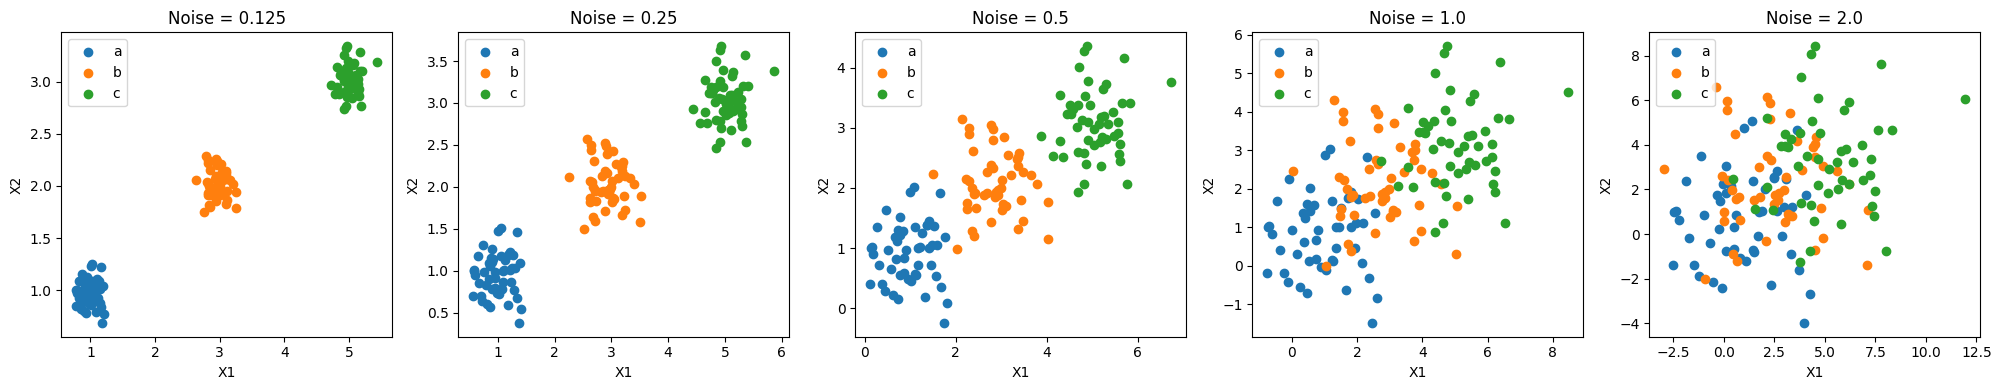

In [2]:
import matplotlib.pyplot as plt

# Create scatterplots for each dataset
datasets = {"0.125": df0_125,
    "0.25": df0_25,
    "0.5": df0_5,
    "1.0": df1_0,
    "2.0": df2_0}

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for i, (noise, df) in enumerate(datasets.items()):
  ax = axes[i]
  for group in df['group'].unique():
    group_data = df[df['group'] == group]
    ax.scatter(group_data['x1'], group_data['x2'], label=group)

  ax.set_title(f"Noise = {noise}")
  ax.set_xlabel("X1")
  ax.set_ylabel("X2")
  ax.legend()

plt.tight_layout()
plt.show()

# when the noise is higher, the points are closer together and less distinct visually.

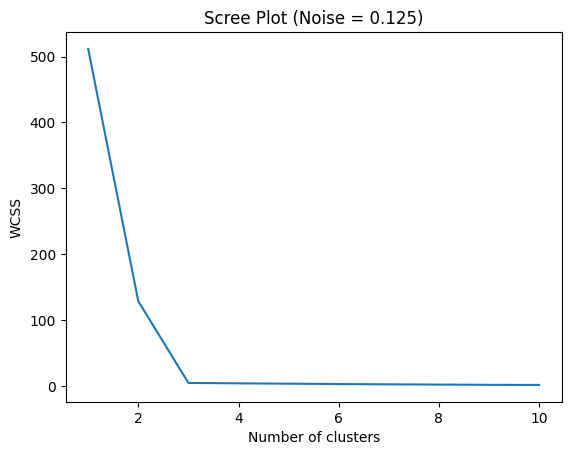

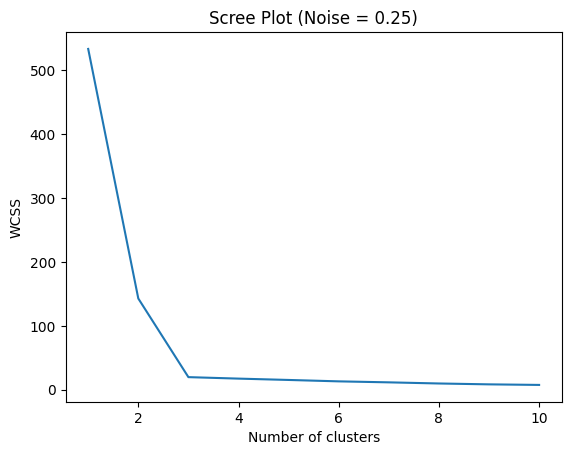

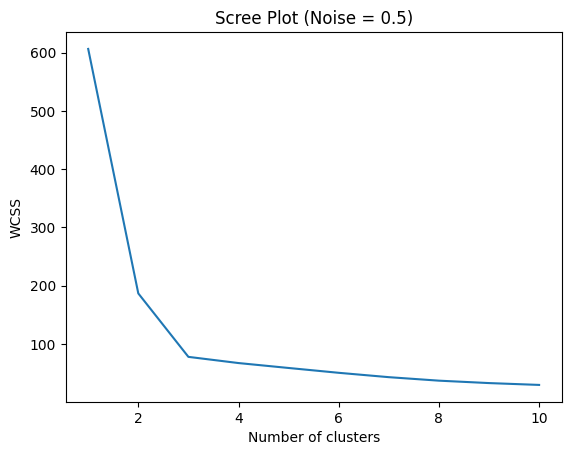

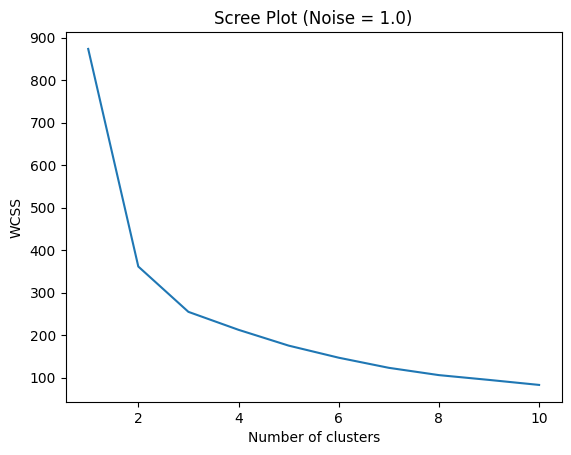

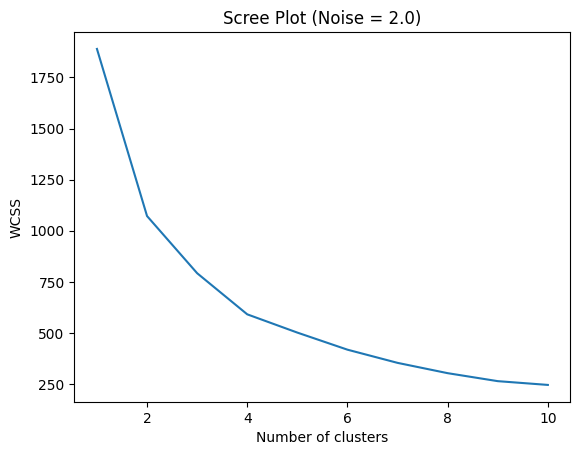

In [4]:
from sklearn.cluster import KMeans

# Function to create scree plot
def scree_plot(df, title):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df[['x1', 'x2']])
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Create scree plots for each dataset
scree_plot(df0_125, "Scree Plot (Noise = 0.125)")
scree_plot(df0_25, "Scree Plot (Noise = 0.25)")
scree_plot(df0_5, "Scree Plot (Noise = 0.5)")
scree_plot(df1_0, "Scree Plot (Noise = 1.0)")
scree_plot(df2_0, "Scree Plot (Noise = 2.0)")

# Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  𝑘
# When the level of noise gets higher, the scree plot becomes less sharply angled - it becomes smoother. For each given number of clusters, the WCSS
# goes up as the noise increases. The "elbow" of the graph becomes less sharply defined and has a higher WCSS as noise increases. When selecting
# the optimal number of clusters (k), the noise matters because it can change k. In the lower noise plots, k is 3. When noise gets higher,
# k shifts to 4.

Explain the intuition of the elbow, using this numerical simulation as an example.

As the noise gets higher, the within clusters sum of squares gets higher - the clusters are less defined and therefore have a higher sum of squares (loose measure of variance). This relationship makes sense because increased noise can decrease the definition/accuracy of the clustering and require more clusters because the points are less defined. When the points are very defined, the elbow is obvious and sharp - indicating that there is a very clear and obvious choice for k (optimal number of clusters). In the higher noice data the elbow is much less defined and more ambiguous - because the points are not defined and the choice of k is less obvious.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [7]:
df=pd.read_csv('clustering/assignment/data/2022 election cycle fundraising.csv')
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [10]:
def clean_dollar_amount(amount_str):
    if isinstance(amount_str, str):
        amount_str = amount_str.replace('$', '').replace(',', '')
        try:
            return float(amount_str)
        except ValueError:
            return None  # Or handle invalid values differently
    elif pd.isna(amount_str):
      return None
    else:
        return amount_str

for col in ['Raised', 'Spent', 'Cash on Hand', 'Debts']:
    df[col] = df[col].apply(clean_dollar_amount)

# Remove rows with NaN values in the relevant columns after cleaning.
df = df.dropna(subset=['Raised', 'Spent', 'Cash on Hand', 'Debts'])

df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
df[['Raised_scaled']] = scaler.fit_transform(df[['Raised']])
df[['Spent_scaled']] = scaler.fit_transform(df[['Spent']])



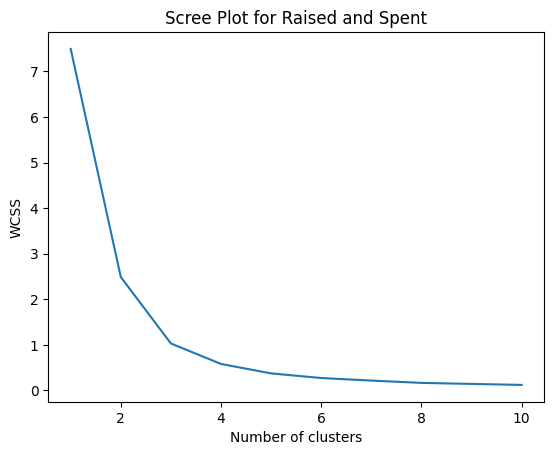

In [14]:
def scree_plot(df, title):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
# Create scree plot for 'Raised' and 'Spent'
scree_plot(df[['Raised_scaled', 'Spent_scaled']], "Scree Plot for Raised and Spent")

# optimal k is 3

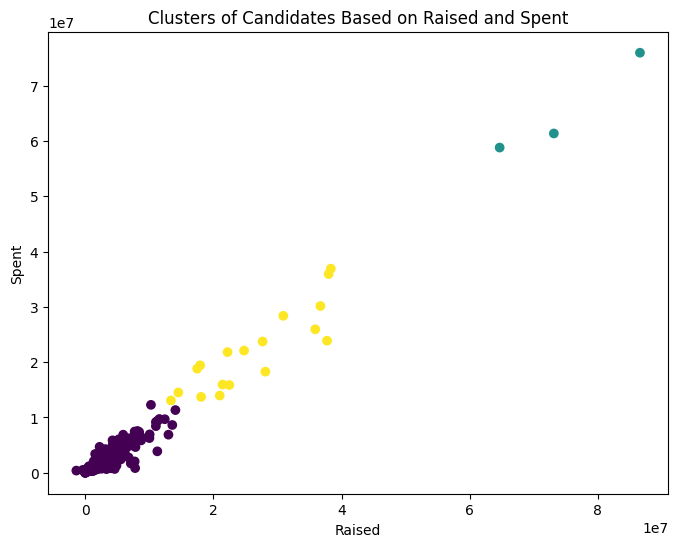

                     Member       Party Chamber           State      Raised  \
2               Adam Schiff  Democratic   House      California  20993041.0   
87   Catherine Cortez Masto  Democratic  Senate          Nevada  37993811.0   
89            Chuck Schumer  Democratic  Senate        New York  35899966.0   
115            Dan Crenshaw  Republican   House           Texas  14535870.0   
261            John Kennedy  Republican  Senate       Louisiana  28119082.0   
290            Katie Porter  Democratic   House      California  21441693.0   
298          Kevin McCarthy  Republican   House      California  24791538.0   
326           Maggie Hassan  Democratic  Senate   New Hampshire  30914830.0   
328             Marco Rubio  Republican  Senate         Florida  36709285.0   
340              Mark Kelly  Democratic  Senate         Arizona  73140886.0   
357          Michael Bennet  Democratic  Senate        Colorado  18086343.0   
390            Nancy Pelosi  Democratic   House     

In [29]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Raised_scaled', 'Spent_scaled']])

# Create scatter plot of 'Raised' against 'Spent', colored by cluster membership
plt.figure(figsize=(8, 6))
plt.scatter(df['Raised'], df['Spent'], c=df['cluster'], cmap='viridis')
plt.title('Clusters of Candidates Based on Raised and Spent')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.show()

# Identify politicians in the smallest two clusters
cluster_sizes = df['cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2).index
smallest_cluster_politicians = df[df['cluster'].isin(smallest_clusters)]

print(smallest_cluster_politicians[['Member', 'Party', 'Chamber', 'State','Raised', 'Spent', 'cluster']])
# the politicians in the smallest cluster raised and spent the most money

In [31]:
scaler = MinMaxScaler()
df[['Cash_scaled']] = scaler.fit_transform(df[['Cash on Hand']])
df[['Debts_scaled']] = scaler.fit_transform(df[['Debts']])

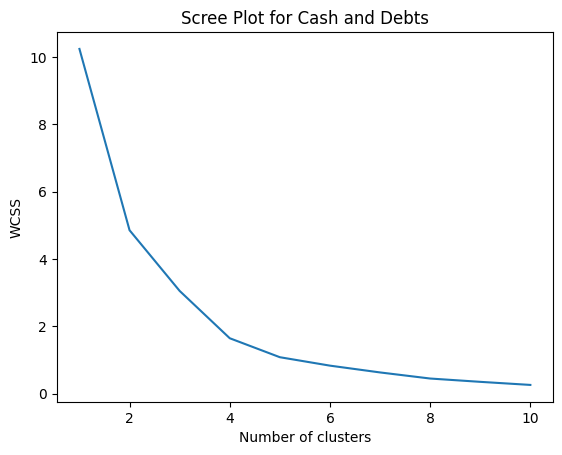

In [34]:
def scree_plot(df, title):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
# Create scree plot for 'Raised' and 'Spent'
scree_plot(df[['Cash_scaled', 'Debts_scaled']], "Scree Plot for Cash and Debts")

# optimal k is 4

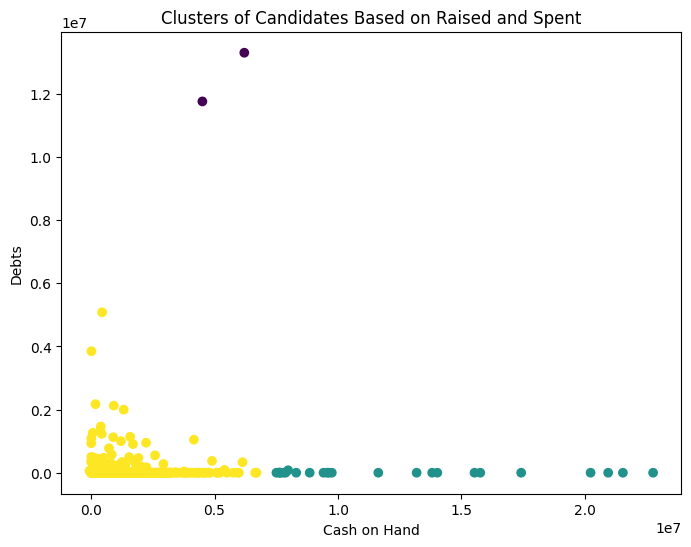

                  Member        Party Chamber           State  Cash on Hand  \
2            Adam Schiff   Democratic   House      California    20942888.0   
11          Alex Padilla   Democratic  Senate      California     7617654.0   
45        Bernie Sanders  Independent  Senate         Vermont     9751125.0   
89         Chuck Schumer   Democratic  Senate        New York    20231213.0   
112          Cory Booker   Democratic  Senate      New Jersey     7671026.0   
133          David Trone   Democratic   House        Maryland     6206371.0   
239           Jim Jordan   Republican   House            Ohio     8855217.0   
247          Joe Manchin   Democratic  Senate   West Virginia     9414431.0   
261         John Kennedy   Republican  Senate       Louisiana    15530074.0   
267           John Thune   Republican  Senate    South Dakota    17419927.0   
274      Josh Gottheimer   Democratic   House      New Jersey    14024163.0   
290         Katie Porter   Democratic   House      C

In [35]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Cash_scaled', 'Debts_scaled']])

# Create scatter plot of 'Raised' against 'Spent', colored by cluster membership
plt.figure(figsize=(8, 6))
plt.scatter(df['Cash on Hand'], df['Debts'], c=df['cluster'], cmap='viridis')
plt.title('Clusters of Candidates Based on Raised and Spent')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.show()

# Identify politicians in the smallest two clusters
cluster_sizes = df['cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2).index
smallest_cluster_politicians = df[df['cluster'].isin(smallest_clusters)]

print(smallest_cluster_politicians[['Member', 'Party', 'Chamber', 'State','Cash on Hand', 'Debts', 'cluster']])
# the politicians in the smallest cluster had the highest debts
# most politicians had low debts and low cash on hand
# some had no cash and some debt
# the blue cluster represents politicians with a lot of cash on hand and very little or no debts

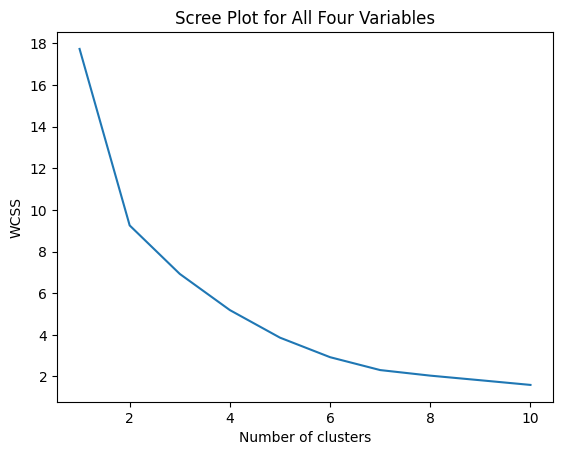

cluster_all
0    501
1     33
2      3
Name: count, dtype: int64


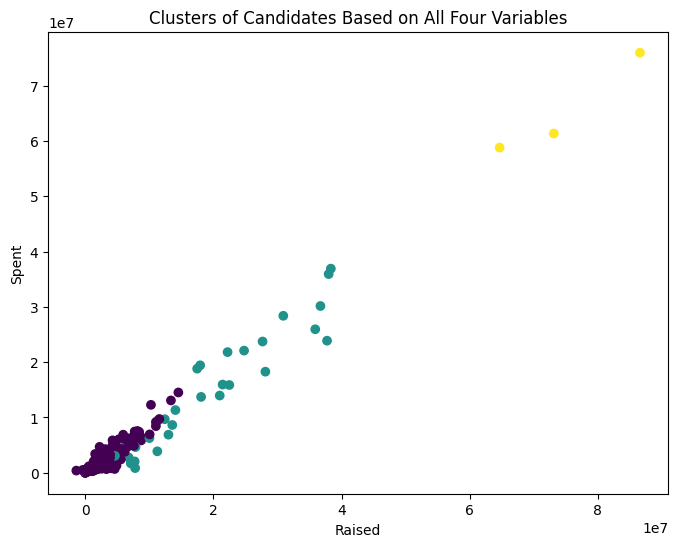

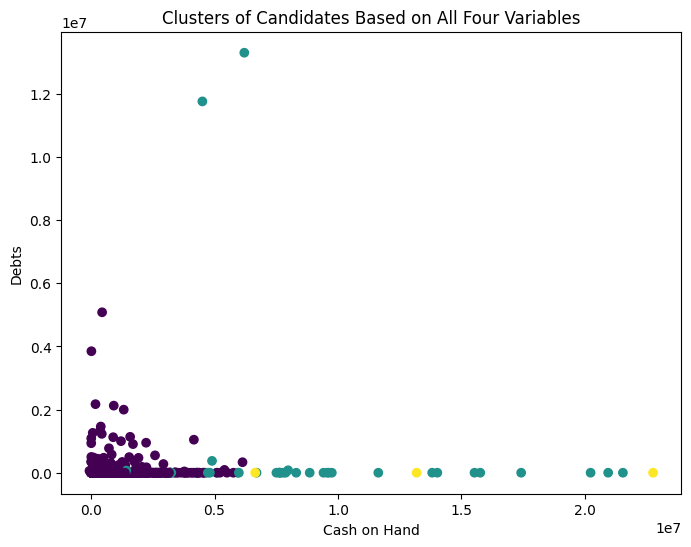

In [40]:
# Use k-means clustering with all four variables
scaler = MinMaxScaler()
df[['Raised_scaled', 'Spent_scaled', 'Cash_scaled', 'Debts_scaled']] = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

scree_plot(df[['Raised_scaled', 'Spent_scaled', 'Cash_scaled', 'Debts_scaled']], "Scree Plot for All Four Variables")

# Determine the optimal k from the scree plot
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster_all'] = kmeans.fit_predict(df[['Raised_scaled', 'Spent_scaled', 'Cash_scaled', 'Debts_scaled']])
# k = 3
# the "elbow" was unclear but maybe at 3

# Comparing cluster sizes
print(df['cluster_all'].value_counts())

# Visualizing clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Raised'], df['Spent'], c=df['cluster_all'], cmap='viridis')
plt.title('Clusters of Candidates Based on All Four Variables')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.show()
# this one is similar to the earlier one

# Visualizing Cluster
plt.figure(figsize=(8, 6))
plt.scatter(df['Cash on Hand'], df['Debts'], c=df['cluster_all'], cmap='viridis')
plt.title('Clusters of Candidates Based on All Four Variables')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.show()
# these clusters are different from the earlier one - when all 4 variables are considered, the clusters
# are different


Did the  𝑘 -MC algorithm find useful patterns for you in analyzing the election?

Based on the analysis performed, the k-means clustering algorithm did reveal some potentially useful patterns in the 2022 election data.  By clustering candidates based on fundraising metrics like 'Raised', 'Spent', 'Cash on Hand', and 'Debts', distinct groups emerged.  

For example, when considering 'Raised' and 'Spent', the smallest clusters often corresponded to candidates who had significantly higher fundraising totals.  This could suggest that these candidates were able to attract substantial financial support, possibly indicating strong campaigns or high-profile races.

Analyzing 'Cash on Hand' and 'Debts' revealed different groupings. Candidates with high cash reserves and low debts formed a distinct cluster. This could signify strong financial positions and a more robust campaign infrastructure.

The analysis using all four variables showed some similarities with the individual variable analyses but also revealed new distinctions.  This indicates that considering multiple financial factors provides a richer understanding of campaign finances.  Whether these patterns translate into predictive insights about election outcomes or strategic campaign planning would require further investigation.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?